In [1]:
pip install spacy

  Using cached spacy-3.7.5-cp39-cp39-win_amd64.whl (12.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandas as pd
import spacy
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

# Load spaCy model
nlp = spacy.load('en_core_web_md')

# Function to embed text
def embed_text(text):
    doc = nlp(text)
    return doc.vector.tolist()

# Load data from Excel
df = pd.read_excel(r"C:\Users\ADITYA\Downloads\Post_it_note.xlsx")

# Assuming 'ideas' is the column containing text to embed
df['vectors'] = df['ideas'].apply(embed_text)

# Save back to Excel with vectors column
df.to_excel('output_with_vectors.xlsx', index=False)

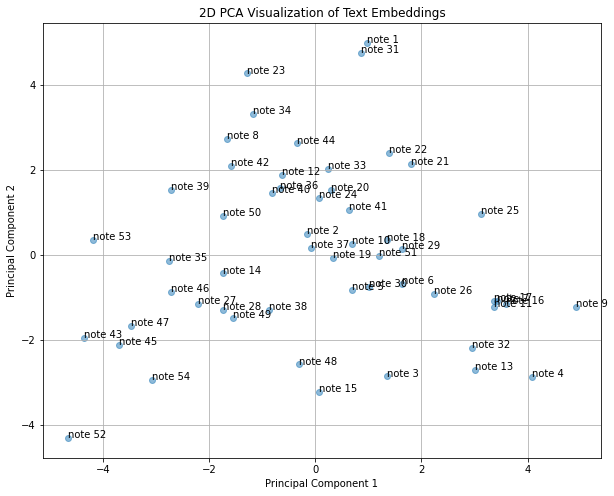

In [28]:
vectors_list = df['vectors'].tolist()

# Perform PCA on vectors
pca = PCA(n_components=2)
vectors_pca = pca.fit_transform(vectors_list)

# Add PCA components to DataFrame
df['PCA1'] = vectors_pca[:, 0]
df['PCA2'] = vectors_pca[:, 1]

# Generate labels for the plot
df['label'] = ['note {}'.format(i+1) for i in range(len(df))]

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(df['PCA1'], df['PCA2'], alpha=0.5)

# Annotate points with labels
for i, label in enumerate(df['label']):
    plt.annotate(label, (df['PCA1'].iloc[i], df['PCA2'].iloc[i]))

plt.title('2D PCA Visualization of Text Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

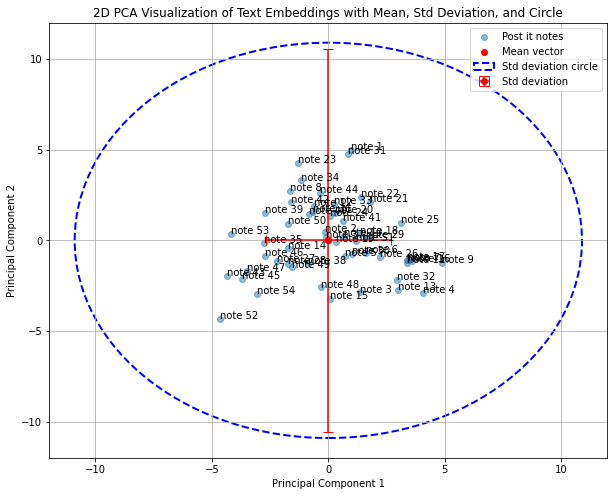

In [29]:
# Calculate mean and standard deviation of embeddings
embeddings_matrix = np.array(vectors_list)
mean_vector = np.mean(embeddings_matrix, axis=0)
std_vector = np.std(embeddings_matrix, axis=0)

# Perform PCA on mean and standard deviation vectors
mean_pca = pca.transform([mean_vector])[0]
std_pca = pca.transform([std_vector])[0]

# Calculate the radius for the circle (use norm of std_pca to get a single radius value)
radius = np.linalg.norm(std_pca)

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(df['PCA1'], df['PCA2'], alpha=0.5, label='Post it notes')

# Annotate points with labels
for i, label in enumerate(df['label']):
    plt.annotate(label, (df['PCA1'].iloc[i], df['PCA2'].iloc[i]))

# Plot mean vector
plt.scatter(mean_pca[0], mean_pca[1], color='red', label='Mean vector')
plt.errorbar(mean_pca[0], mean_pca[1], xerr=std_pca[0], yerr=std_pca[1], color='red', fmt='o', capsize=5, label='Std deviation')

# Draw circle with radius equal to the norm of the std_pca
circle = plt.Circle((mean_pca[0], mean_pca[1]), radius, color='blue', fill=False, linestyle='--', linewidth=2, label='Std deviation circle')
plt.gca().add_patch(circle)

plt.title('2D PCA Visualization of Text Embeddings with Mean, Std Deviation, and Circle')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

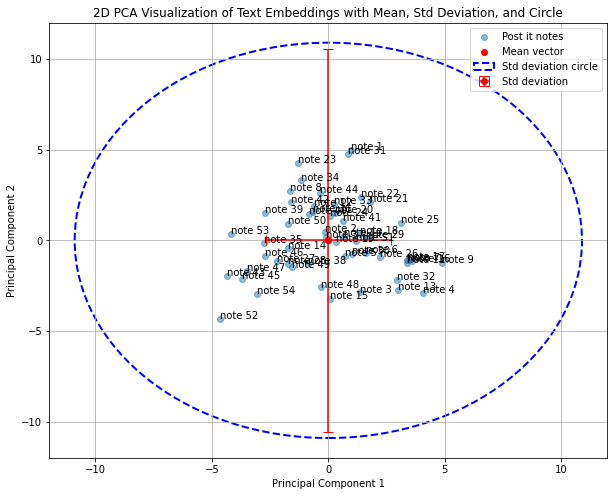

      label  nearest_prior_distance
0    note 1                0.000000
1    note 2                4.646794
2    note 3                3.672712
3    note 4                2.733064
4    note 5                1.573818
5    note 6                0.942255
6    note 7                1.837042
7    note 8                2.705648
8    note 9                1.488333
9   note 10                0.872349
10  note 11                0.142357
11  note 12                1.335392
12  note 13                1.085352
13  note 14                1.834891
14  note 15                1.329310
15  note 16                0.180099
16  note 17                0.060488
17  note 18                0.669791
18  note 19                0.475655
19  note 20                0.992849
20  note 21                1.630520
21  note 22                0.484860
22  note 23                1.580058
23  note 24                0.280215
24  note 25                1.764176
25  note 26                0.650853
26  note 27                0

In [30]:
distances = cdist(vectors_pca, vectors_pca)

# Find nearest prior point distance for each point
nearest_prior_distances = []
for i in range(1, len(distances)):
    prior_distances = distances[i, :i]
    nearest_prior_distances.append(np.min(prior_distances))

# Add nearest prior distances to DataFrame
df['nearest_prior_distance'] = [0] + nearest_prior_distances  # First point has no prior point

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(df['PCA1'], df['PCA2'], alpha=0.5, label='Post it notes')

# Annotate points with labels
for i, label in enumerate(df['label']):
    plt.annotate(label, (df['PCA1'].iloc[i], df['PCA2'].iloc[i]))

# Plot mean vector
plt.scatter(mean_pca[0], mean_pca[1], color='red', label='Mean vector')
plt.errorbar(mean_pca[0], mean_pca[1], xerr=std_pca[0], yerr=std_pca[1], color='red', fmt='o', capsize=5, label='Std deviation')

# Draw circle with radius equal to the norm of the std_pca
circle = plt.Circle((mean_pca[0], mean_pca[1]), radius, color='blue', fill=False, linestyle='--', linewidth=2, label='Std deviation circle')
plt.gca().add_patch(circle)

plt.title('2D PCA Visualization of Text Embeddings with Mean, Std Deviation, and Circle')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Print the DataFrame with nearest prior distances
print(df[['label', 'nearest_prior_distance']])

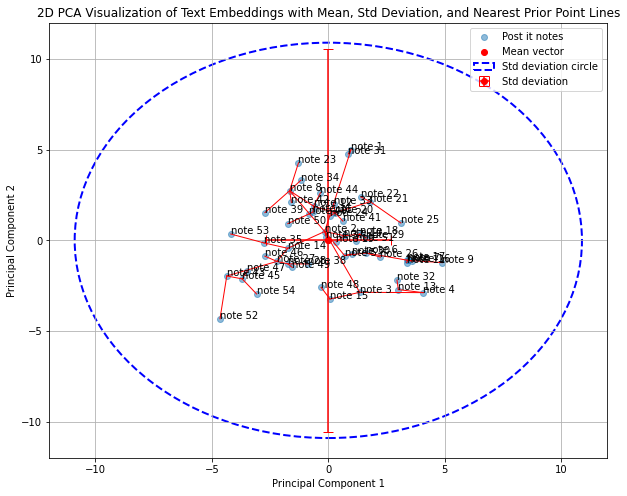

      label  nearest_prior_distance
0    note 1                0.000000
1    note 2                4.646794
2    note 3                3.672712
3    note 4                2.733064
4    note 5                1.573818
5    note 6                0.942255
6    note 7                1.837042
7    note 8                2.705648
8    note 9                1.488333
9   note 10                0.872349
10  note 11                0.142357
11  note 12                1.335392
12  note 13                1.085352
13  note 14                1.834891
14  note 15                1.329310
15  note 16                0.180099
16  note 17                0.060488
17  note 18                0.669791
18  note 19                0.475655
19  note 20                0.992849
20  note 21                1.630520
21  note 22                0.484860
22  note 23                1.580058
23  note 24                0.280215
24  note 25                1.764176
25  note 26                0.650853
26  note 27                0

In [31]:
distances = cdist(vectors_pca, vectors_pca)

# Find nearest prior point distance for each point and plot lines
nearest_prior_indices = []
nearest_prior_distances = []
for i in range(1, len(distances)):
    prior_distances = distances[i, :i]
    nearest_prior_idx = np.argmin(prior_distances)
    nearest_prior_indices.append(nearest_prior_idx)
    nearest_prior_distances.append(np.min(prior_distances))

# Add nearest prior distances to DataFrame
df['nearest_prior_distance'] = [0] + nearest_prior_distances  # First point has no prior point

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(df['PCA1'], df['PCA2'], alpha=0.5, label='Post it notes')

# Annotate points with labels
for i, label in enumerate(df['label']):
    plt.annotate(label, (df['PCA1'].iloc[i], df['PCA2'].iloc[i]))

# Plot mean vector
plt.scatter(mean_pca[0], mean_pca[1], color='red', label='Mean vector')
plt.errorbar(mean_pca[0], mean_pca[1], xerr=std_pca[0], yerr=std_pca[1], color='red', fmt='o', capsize=5, label='Std deviation')

# Draw circle with radius equal to the norm of the std_pca
circle = plt.Circle((mean_pca[0], mean_pca[1]), radius, color='blue', fill=False, linestyle='--', linewidth=2, label='Std deviation circle')
plt.gca().add_patch(circle)

# Draw red lines between each post-it note and its nearest prior point
for i, prior_idx in enumerate(nearest_prior_indices, start=1):
    plt.plot(
        [df['PCA1'].iloc[i], df['PCA1'].iloc[prior_idx]], 
        [df['PCA2'].iloc[i], df['PCA2'].iloc[prior_idx]], 
        'r-', 
        linewidth=1
    )

plt.title('2D PCA Visualization of Text Embeddings with Mean, Std Deviation, and Nearest Prior Point Lines')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Print the DataFrame with nearest prior distances
print(df[['label', 'nearest_prior_distance']])

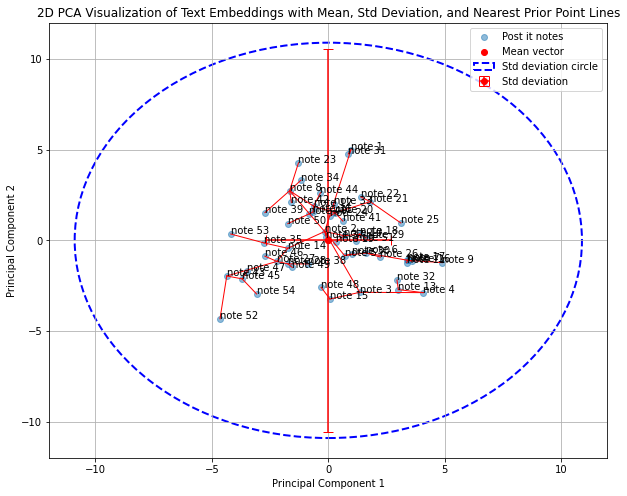

In [32]:
distances = cdist(vectors_pca, vectors_pca)

# Find nearest prior point distance for each point and plot lines
nearest_prior_distances = []
for i in range(1, len(distances)):
    prior_distances = distances[i, :i]
    nearest_prior_distances.append(np.min(prior_distances))

# Add nearest prior distances to DataFrame
df['nearest_prior_distance'] = [0] + nearest_prior_distances  # First point has no prior point

# Plotting PCA scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(df['PCA1'], df['PCA2'], alpha=0.5, label='Post it notes')

# Annotate points with labels
for i, label in enumerate(df['label']):
    plt.annotate(label, (df['PCA1'].iloc[i], df['PCA2'].iloc[i]))

# Plot mean vector
plt.scatter(mean_pca[0], mean_pca[1], color='red', label='Mean vector')
plt.errorbar(mean_pca[0], mean_pca[1], xerr=std_pca[0], yerr=std_pca[1], color='red', fmt='o', capsize=5, label='Std deviation')

# Draw circle with radius equal to the norm of the std_pca
circle = plt.Circle((mean_pca[0], mean_pca[1]), radius, color='blue', fill=False, linestyle='--', linewidth=2, label='Std deviation circle')
plt.gca().add_patch(circle)

# Draw red lines between each post-it note and its nearest prior point
for i in range(1, len(df)):
    prior_idx = np.argmin(distances[i, :i])
    plt.plot(
        [df['PCA1'].iloc[i], df['PCA1'].iloc[prior_idx]], 
        [df['PCA2'].iloc[i], df['PCA2'].iloc[prior_idx]], 
        'r-', 
        linewidth=1
    )

plt.title('2D PCA Visualization of Text Embeddings with Mean, Std Deviation, and Nearest Prior Point Lines')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

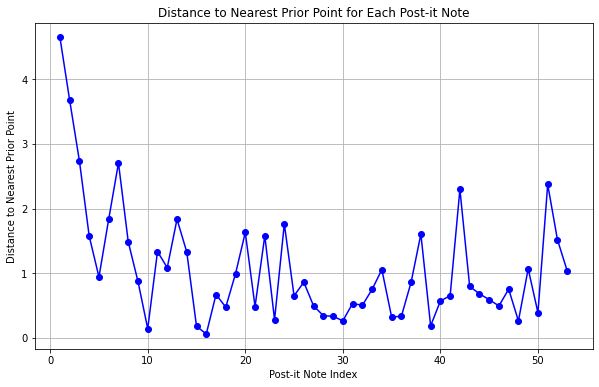

      label  nearest_prior_distance
0    note 1                0.000000
1    note 2                4.646794
2    note 3                3.672712
3    note 4                2.733064
4    note 5                1.573818
5    note 6                0.942255
6    note 7                1.837042
7    note 8                2.705648
8    note 9                1.488333
9   note 10                0.872349
10  note 11                0.142357
11  note 12                1.335392
12  note 13                1.085352
13  note 14                1.834891
14  note 15                1.329310
15  note 16                0.180099
16  note 17                0.060488
17  note 18                0.669791
18  note 19                0.475655
19  note 20                0.992849
20  note 21                1.630520
21  note 22                0.484860
22  note 23                1.580058
23  note 24                0.280215
24  note 25                1.764176
25  note 26                0.650853
26  note 27                0

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(df)), nearest_prior_distances, marker='o', linestyle='-', color='b')
plt.title('Distance to Nearest Prior Point for Each Post-it Note')
plt.xlabel('Post-it Note Index')
plt.ylabel('Distance to Nearest Prior Point')
plt.grid(True)
plt.show()

# Print the DataFrame with nearest prior distances
print(df[['label', 'nearest_prior_distance']])

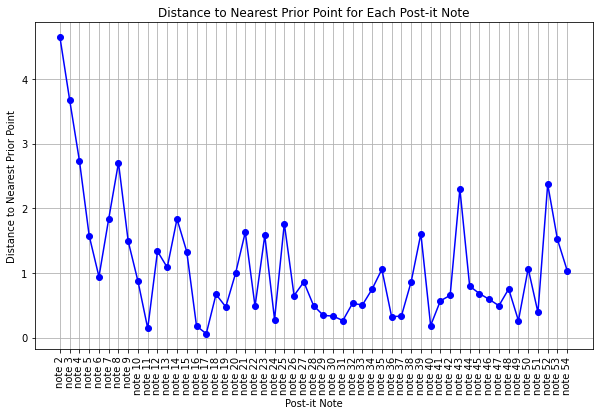

      label  nearest_prior_distance
0    note 1                0.000000
1    note 2                4.646794
2    note 3                3.672712
3    note 4                2.733064
4    note 5                1.573818
5    note 6                0.942255
6    note 7                1.837042
7    note 8                2.705648
8    note 9                1.488333
9   note 10                0.872349
10  note 11                0.142357
11  note 12                1.335392
12  note 13                1.085352
13  note 14                1.834891
14  note 15                1.329310
15  note 16                0.180099
16  note 17                0.060488
17  note 18                0.669791
18  note 19                0.475655
19  note 20                0.992849
20  note 21                1.630520
21  note 22                0.484860
22  note 23                1.580058
23  note 24                0.280215
24  note 25                1.764176
25  note 26                0.650853
26  note 27                0

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(df['label'][1:], nearest_prior_distances, marker='o', linestyle='-', color='b')
plt.xticks(rotation=90)
plt.title('Distance to Nearest Prior Point for Each Post-it Note')
plt.xlabel('Post-it Note')
plt.ylabel('Distance to Nearest Prior Point')
plt.grid(True)
plt.show()

# Print the DataFrame with nearest prior distances
print(df[['label', 'nearest_prior_distance']])

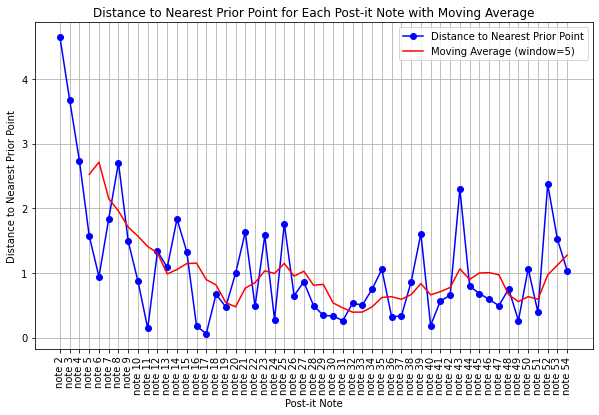

      label  nearest_prior_distance  moving_average
0    note 1                0.000000             NaN
1    note 2                4.646794             NaN
2    note 3                3.672712             NaN
3    note 4                2.733064             NaN
4    note 5                1.573818        2.525278
5    note 6                0.942255        2.713729
6    note 7                1.837042        2.151778
7    note 8                2.705648        1.958365
8    note 9                1.488333        1.709419
9   note 10                0.872349        1.569125
10  note 11                0.142357        1.409146
11  note 12                1.335392        1.308816
12  note 13                1.085352        0.984757
13  note 14                1.834891        1.054068
14  note 15                1.329310        1.145460
15  note 16                0.180099        1.153009
16  note 17                0.060488        0.898028
17  note 18                0.669791        0.814916
18  note 19 

In [39]:
window_size = 5  # Adjust the window size as needed
df['moving_average'] = df['nearest_prior_distance'].rolling(window=window_size).mean()

# Plotting distance to nearest prior point for each idea with moving average
plt.figure(figsize=(10, 6))
plt.plot(df['label'][1:], nearest_prior_distances, marker='o', linestyle='-', color='b', label='Distance to Nearest Prior Point')
plt.plot(df['label'][1:], df['moving_average'][1:], linestyle='-', color='r', label='Moving Average (window={})'.format(window_size))
plt.xticks(rotation=90)
plt.title('Distance to Nearest Prior Point for Each Post-it Note with Moving Average')
plt.xlabel('Post-it Note')
plt.ylabel('Distance to Nearest Prior Point')
plt.legend()
plt.grid(True)
plt.show()

# Print the DataFrame with nearest prior distances and moving average
print(df[['label', 'nearest_prior_distance', 'moving_average']])

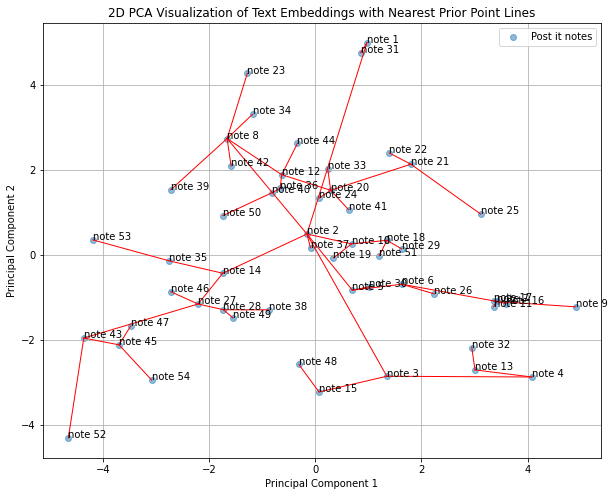

      label  nearest_prior_distance
0    note 1                0.000000
1    note 2                4.646794
2    note 3                3.672712
3    note 4                2.733064
4    note 5                1.573818
5    note 6                0.942255
6    note 7                1.837042
7    note 8                2.705648
8    note 9                1.488333
9   note 10                0.872349
10  note 11                0.142357
11  note 12                1.335392
12  note 13                1.085352
13  note 14                1.834891
14  note 15                1.329310
15  note 16                0.180099
16  note 17                0.060488
17  note 18                0.669791
18  note 19                0.475655
19  note 20                0.992849
20  note 21                1.630520
21  note 22                0.484860
22  note 23                1.580058
23  note 24                0.280215
24  note 25                1.764176
25  note 26                0.650853
26  note 27                0

In [40]:
distances = cdist(vectors_pca, vectors_pca)

# Find nearest prior point distance for each point
nearest_prior_indices = []
nearest_prior_distances = []
for i in range(1, len(distances)):
    prior_distances = distances[i, :i]
    nearest_prior_idx = np.argmin(prior_distances)
    nearest_prior_indices.append(nearest_prior_idx)
    nearest_prior_distances.append(np.min(prior_distances))

# Add nearest prior distances to DataFrame
df['nearest_prior_distance'] = [0] + nearest_prior_distances  # First point has no prior point

# Plotting PCA scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(df['PCA1'], df['PCA2'], alpha=0.5, label='Post it notes')

# Annotate points with labels
for i, label in enumerate(df['label']):
    plt.annotate(label, (df['PCA1'].iloc[i], df['PCA2'].iloc[i]))

# Draw red lines between each post-it note and its nearest prior point
for i in range(1, len(df)):
    prior_idx = np.argmin(distances[i, :i])
    plt.plot(
        [df['PCA1'].iloc[i], df['PCA1'].iloc[prior_idx]], 
        [df['PCA2'].iloc[i], df['PCA2'].iloc[prior_idx]], 
        'r-', 
        linewidth=1
    )

plt.title('2D PCA Visualization of Text Embeddings with Nearest Prior Point Lines')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Print the DataFrame with nearest prior distances
print(df[['label', 'nearest_prior_distance']])

In [41]:
output_file_path = 'output_embeddings.csv'
df['embedding_vector'] = df['vectors'].apply(lambda x: ','.join(map(str, x)))
df.to_csv(output_file_path, index=False, columns=['label', 'ideas', 'embedding_vector', 'PCA1', 'PCA2', 'nearest_prior_distance'])